# 亚马逊畅销榜书籍数据探索

# 0. 观察数据集

In [2]:

import pandas as pd

In [3]:
df = pd.read_csv('data\\bestsellers.csv', encoding='utf-8')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [6]:
df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

我们发现非小说的书在畅销书榜上占比稍多一点，大约56%的书属于非小说的书籍。

## 1. 书籍评分

In [6]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


```思考```数据集存在重复书籍（某些书连续多年上畅销榜），如何确定书籍的用户评分、评分量等数据？

In [7]:
df[df[['Name', 'Author']].duplicated()]  # Name 和 Author 相同，即可认为是一本书

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


```对数据进行聚合操作，重复书籍的评分和评分量可取平均值```

In [9]:
data = df.groupby(['Name', 'Author', 'Genre'],
                  as_index=False)[['User Rating', 'Reviews']].mean()
data

,Name,Author,Genre,User Rating,Reviews
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction,4.7,17350.0
1,11/22/63: A Novel,Stephen King,Fiction,4.6,2052.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction,4.7,18979.0
3,1984 (Signet Classics),George Orwell,Fiction,4.7,21424.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction,4.8,7665.0
...,...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,Fiction,4.5,10760.0
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,Non Fiction,4.2,1302.0
348,Wonder,R. J. Palacio,Fiction,4.8,21625.0
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0


根据用户的评分，对书籍进行排序

In [10]:
data.sort_values(by='User Rating', ascending=False).head(10)

,Name,Author,Genre,User Rating,Reviews
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
197,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,Fiction,4.9,3836.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0
119,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,Fiction,4.9,3146.0
118,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,Fiction,4.9,7758.0
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0
68,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,Fiction,4.9,7235.0
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0
196,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,Fiction,4.9,7150.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9,7038.0


按照评分排序，我们可以看到很多书的评分都相当高，高达4.9的书很多。但是，这些打分量差异很大，有的只有3000多一点，有的近两万，因此我们可以使用更兼顾的策略，只有一本书评分和评分的量都高，才能认为他的评分是能够表达真实、客观的评价。  

<img src='resource/加权评分.jpg' style='zoom:70%'>  

* R：这本书的评分  
* v：这本书的评分量  
* m：能够列入畅销书的最小评分量  
* C：数据集中的平均评分

In [10]:
m = df['Reviews'].min()  # 数据集的最小评分量
C = df['User Rating'].mean()  # 数据集的平均评分


def weight_rating(data, m=m, C=C):
    R = data['User Rating']
    v = data['Reviews']
    return v / (v + m) * R + m / (v + m) * C

如何将这个函数用在当前的dataframe中呢？可以考虑 DataFrame.apply方法。 

df.apply(函数名（或者lambda表达式）,axis=0)

In [12]:
a = pd.DataFrame({'a': [1, 2],
                  'b': [3, 4]}, index=['c1', 'c2'])
a

,a,b
c1,1,3
c2,2,4


In [13]:
a.apply(lambda x: x['a'] * 5, axis=1)

c1     5
c2    10
dtype: int64

In [14]:
a.apply(lambda x: x['c1'] * 5, axis=0)

a     5
b    15
dtype: int64

In [11]:
df['weighted_rating'] = df.apply(weight_rating, axis=1)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,weighted_rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,4.898897
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,4.699790
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,4.699790
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,4.699790


``根据新的打分标准对书籍进行从高到低的排名``

In [12]:
df.groupby(['Name', 'Author', 'Genre'],
           as_index=False)['weighted_rating'].mean().sort_values(
    by='weighted_rating', ascending=False).head(10)

,Name,Author,Genre,weighted_rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.898894


然后我们发现，处理之后，10本书里，只有1本是非小说类型的。

In [13]:
df.groupby(['Genre'])['weighted_rating'].mean()

Genre
Fiction        4.648178
Non Fiction    4.595980
Name: weighted_rating, dtype: float64

非小说类型的书的平均评分略低于小说类型的书。

## 2. 书籍价格

In [18]:
price_df = df.groupby(['Name', 'Author', 'Genre'],
                      as_index=False)['Price'].mean().sort_values(
    by='Price', ascending=False).head(10)
price_df

,Name,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
333,Watchmen,Alan Moore,Fiction,42.0
281,The Official SAT Study Guide,The College Board,Non Fiction,40.0
220,The Alchemist,Paulo Coelho,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


In [19]:

import matplotlib.pyplot as plt
% matplotlib inline
#plt.rcParams['font.sans-serif']='simhei'

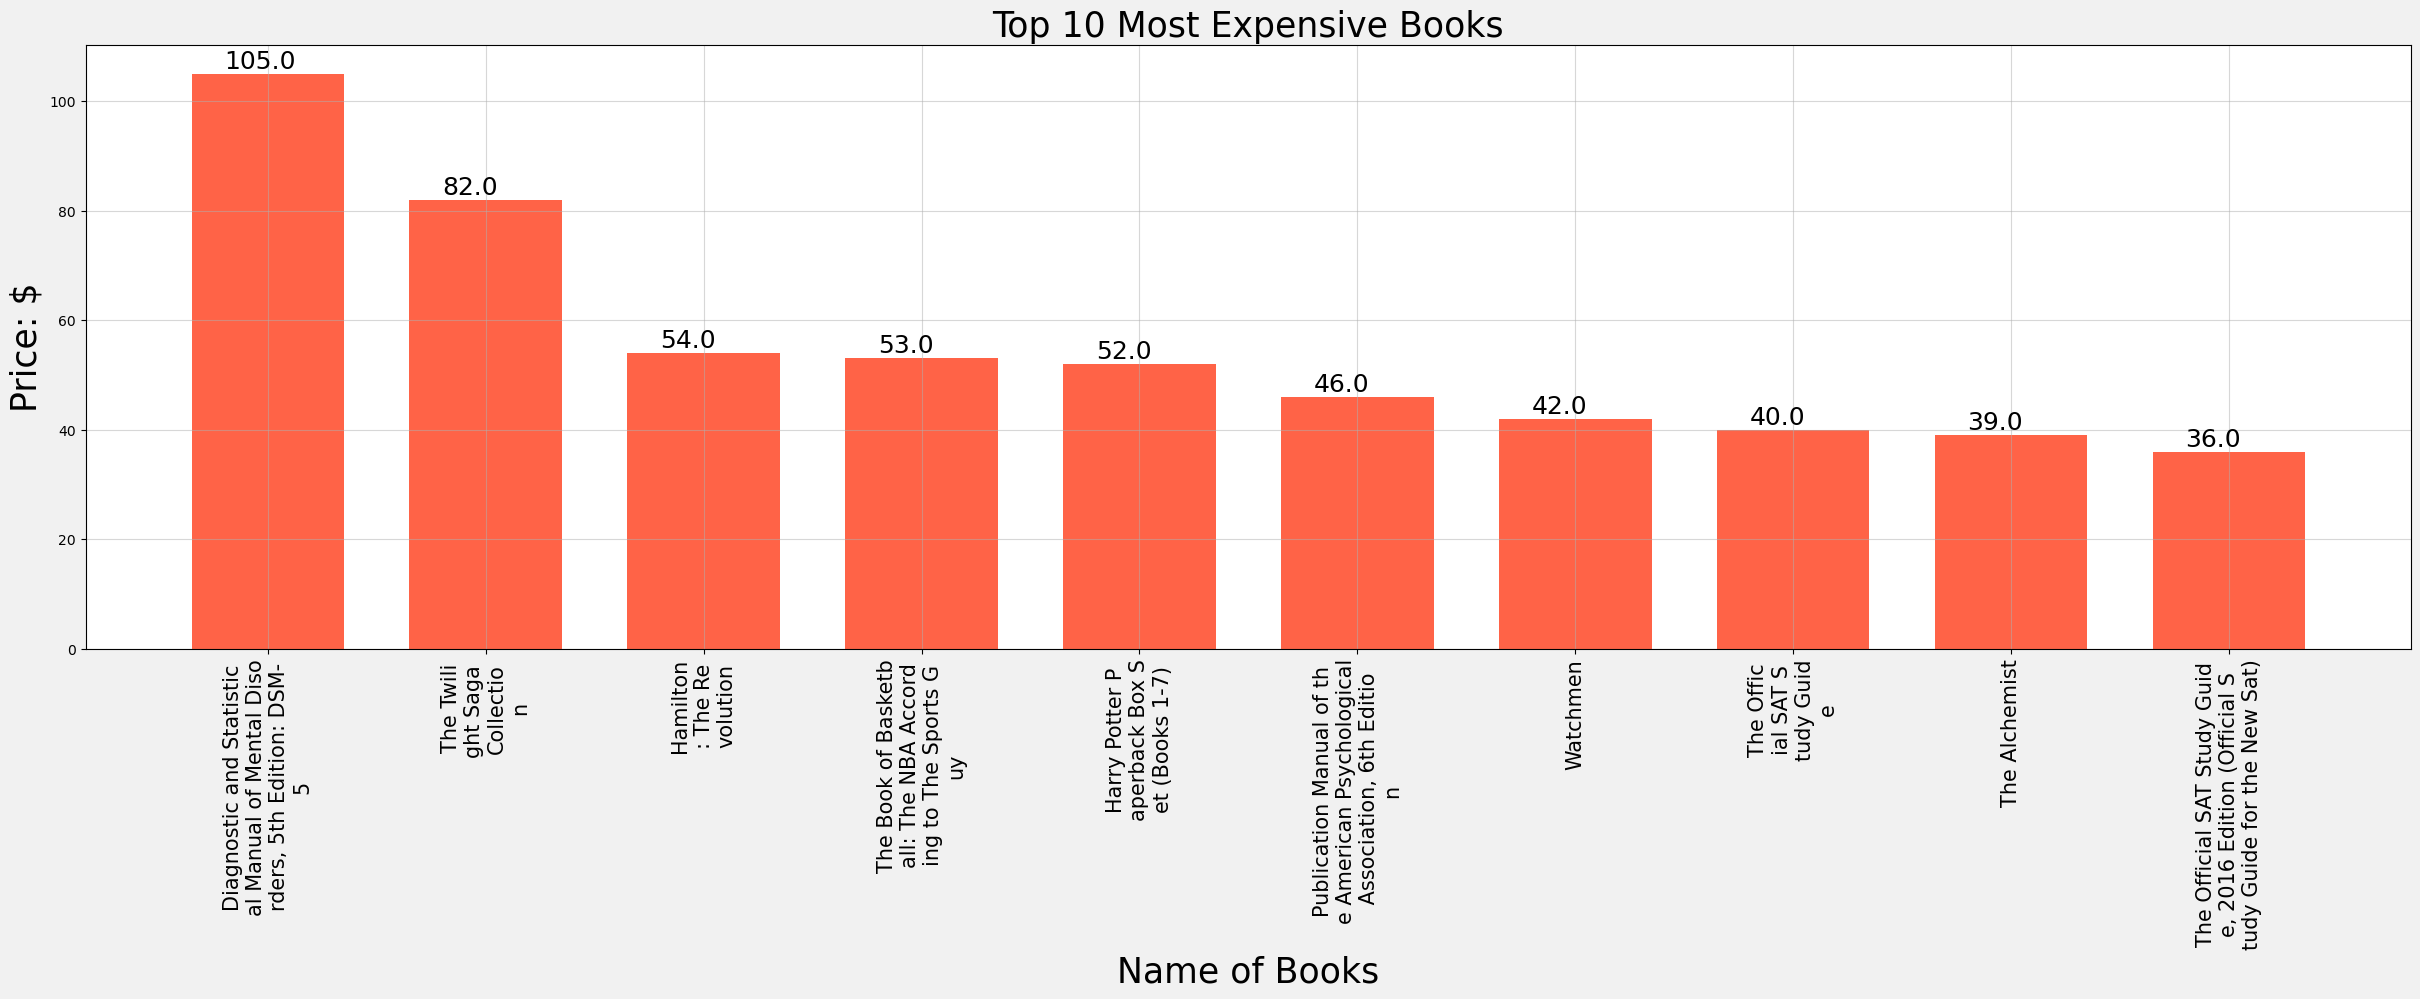

In [23]:
plt.figure(figsize=(30, 8), dpi=100, facecolor='#f1f1f1')
plt.bar(x=price_df['Name'].apply(lambda x: x if len(x) < 20
else '\n'.join(x[i:i + len(x) // 3] for i in range(0, len(x), len(x) // 3))),
        height=price_df['Price'], width=0.7,
        color='tomato')

plt.tick_params(axis='x', rotation=90, labelsize=15)  # 设置 tick 的参数
plt.title('Top 10 Most Expensive Books', fontsize=25)
plt.xlabel('Name of Books', fontsize=25)
plt.ylabel('Price: $', fontsize=25)
plt.grid(True, linestyle="-", alpha=0.5)

for x, price in enumerate(price_df['Price'].values):
    plt.text(x - 0.2, price + 1, str(price), fontsize=18)



In [24]:
df.groupby(['Genre'], as_index=False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


## 3. 书籍评分量  

研究作者和其对应作品评分、评分量的关系。

检查是否存在同一作者有多部作品上榜情况

In [25]:
df[df['Author'].duplicated() & (~df[['Name', 'Author']].duplicated())]

,Name,Author,User Rating,Reviews,Price,Year,Genre,weighted_rating
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,4.699847
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction,4.402704
31,"Barefoot Contessa, How Easy Is That?: Fabulous...",Ina Garten,4.7,615,21,2010,Non Fiction,4.695367
39,"Broke: The Plan to Restore Our Trust, Truth an...",Glenn Beck,4.5,471,8,2010,Non Fiction,4.508621
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction,4.798280
...,...,...,...,...,...,...,...,...
520,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction,4.301738
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction,4.898261
523,Uninvited: Living Loved When You Feel Less Tha...,Lysa TerKeurst,4.7,4585,9,2016,Non Fiction,4.699346
528,What Pet Should I Get? (Classic Seuss),Dr. Seuss,4.7,1873,14,2015,Fiction,4.698419


In [26]:
df[df['Author'] == "Stephen King"]

,Name,Author,User Rating,Reviews,Price,Year,Genre,weighted_rating
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
79,Doctor Sleep: A Novel,Stephen King,4.7,15845,13,2013,Fiction,4.699810
194,Joyland (Hard Case Crime),Stephen King,4.5,4748,12,2013,Fiction,4.500915
520,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction,4.301738


In [15]:
reviewed_df = df.groupby(['Author'],
                         as_index=False)[['weighted_rating', 'Reviews']].mean().sort_values(
    by='Reviews', ascending=False).head(10)
reviewed_df

,Author,weighted_rating,Reviews
68,Delia Owens,4.799924,87841.0
180,Paula Hawkins,4.100241,79446.0
168,Michelle Obama,4.799890,61133.0
100,Gillian Flynn,4.000399,57271.0
142,Kristin Hannah,4.799864,49288.0
128,John Green,4.660055,42083.8
15,Andy Weir,4.699924,39459.0
21,Anthony Doerr,4.600019,36348.0
182,Paulo Coelho,4.699916,35799.0
71,Donna Tartt,3.900784,33844.0


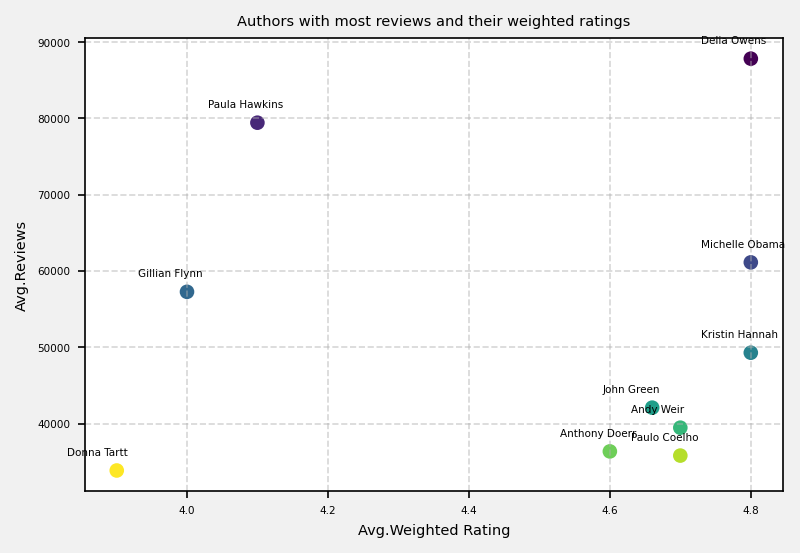

In [30]:
plt.figure(figsize=(6, 4), dpi=150, facecolor='#f1f1f1')

x = reviewed_df['weighted_rating']
y = reviewed_df['Reviews']
text = reviewed_df['Author']

plt.scatter(x, y, marker='o', c=[i for i in range(reviewed_df.shape[0])],
            cmap='viridis')

for i in range(reviewed_df.shape[0]):
    plt.annotate(text.iloc[i], xy=(x.iloc[i], y.iloc[i]),
                 xytext=(x.iloc[i] - 0.07, y.iloc[i] + 2000),
                 fontsize=5)

plt.title('Authors with most reviews and their weighted ratings',
          fontsize=7)
plt.xlabel('Avg.Weighted Rating', fontsize=7)
plt.ylabel('Avg.Reviews', fontsize=7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(labelsize=5)

In [17]:
genre_df = df.groupby(['Genre'])['Reviews'].mean()
genre_df

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

Text(0.3, 1.1, 'Average number of Reviews in Each Genre')

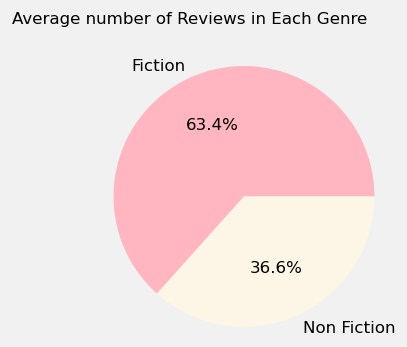

In [32]:
plt.figure(figsize=(5, 3), dpi=120, facecolor='#f1f1f1')
plt.pie(genre_df, radius=1.2, labels=genre_df.index, colors=['lightpink',
                                                             'oldlace'], autopct='%1.1f%%')

plt.title('Average number of Reviews in Each Genre', x=0.3, y=1.1,
          fontsize=10)

## 4. 趋势

In [33]:
year_df = df.groupby(['Genre', 'Year'],
                     as_index=False)['Reviews'].mean()
year_df

,Genre,Year,Reviews
0,Fiction,2009,6534.333333
1,Fiction,2010,8409.250000
2,Fiction,2011,10335.285714
3,Fiction,2012,19896.238095
4,Fiction,2013,19986.833333
5,Fiction,2014,19382.862069
6,Fiction,2015,23706.117647
7,Fiction,2016,19563.263158
8,Fiction,2017,14611.833333
9,Fiction,2018,12710.428571


In [34]:
x = year_df['Year'].unique()
y1 = year_df[year_df['Genre'] == 'Fiction']['Reviews']
y2 = year_df[year_df['Genre'] == 'Non Fiction']['Reviews']
y3 = [(i + j) / 2 for i, j in zip(y1, y2)]

y3

[4780.282051282051,
 5967.891666666666,
 8409.022167487685,
 14029.584564860426,
 13363.089743589742,
 15188.90722495895,
 16529.801247771837,
 15234.825127334465,
 12954.685897435898,
 13762.145320197043,
 16333.141666666666]

Text(0.5, 1.0, 'Trend of Average number of Reviews in Amazon Top 50 best selling Books')

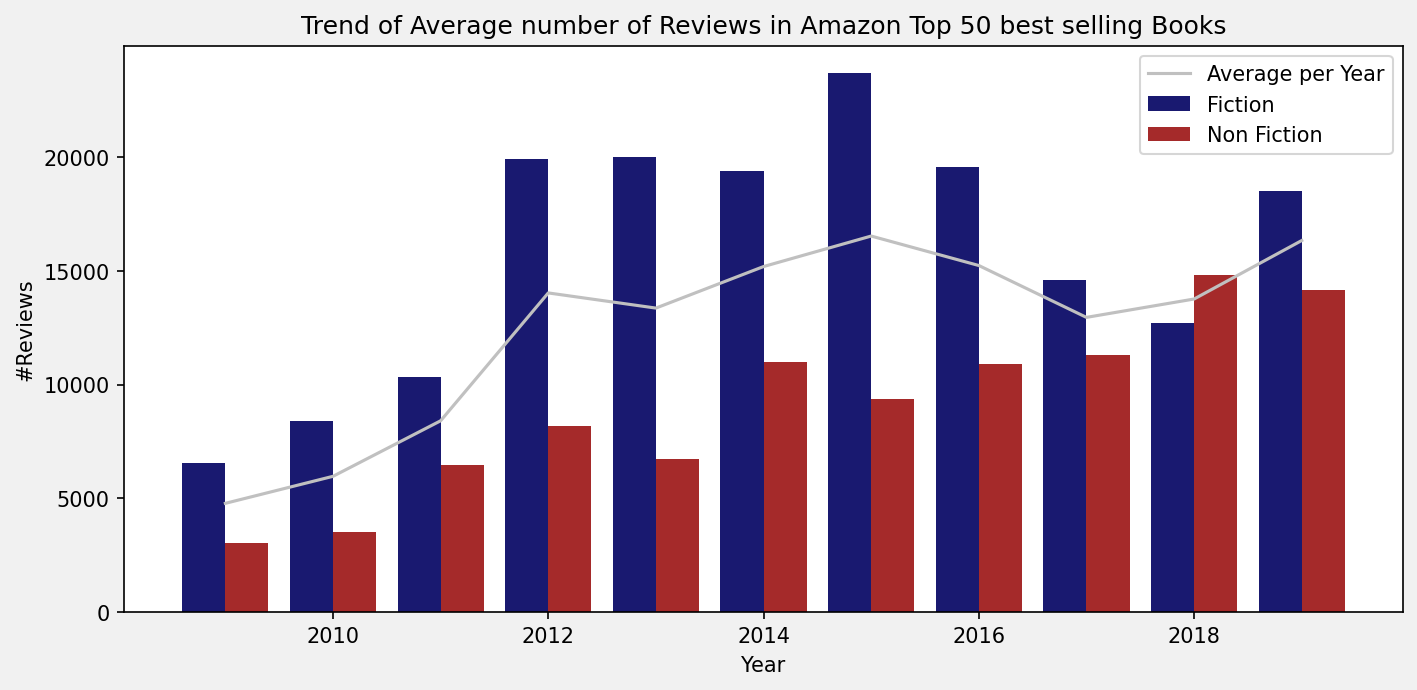

In [35]:
plt.figure(figsize=(11, 5), dpi=150, facecolor='#f1f1f1')
width = 0.4
plt.bar(x=x - width / 2, height=y1, width=width, color='midnightblue',
        label='Fiction')
plt.bar(x=x + width / 2, height=y2, width=width, color='brown',
        label='Non Fiction')
plt.plot(x, y3, color='silver', label='Average per Year')
plt.xlabel('Year')
plt.ylabel('#Reviews')
plt.legend()
plt.title('Trend of Average number of Reviews in Amazon Top \
50 best selling Books')